Practical No. 07

Aim: To perform and analysis of Logistic Regression Algorithm

In [3]:
#Name : Santosh G. Kandalkar
#Roll no. : 74 (BDA-B74)
#Section : B
#Subject : PE-II
#Date : 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
import os

In [9]:
os.getcwd()

'C:\\Users\\SANTOSH\\Desktop\\Study Hub\\6th Semester\\PE - II\\Big-Data-Analytics'

In [11]:
os.chdir("C:\\Users\\SANTOSH\\Desktop\\Study Hub\\6th Semester\\PE - II\\Big-Data-Analytics")

In [13]:
data = pd.read_csv("HouseData.csv")

In [15]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [17]:
data.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [21]:
data.info

<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  c

In [23]:
data.shape

(4600, 18)

In [25]:
data.size

82800

In [27]:
data.ndim

2

Data pre-processing, data-cleaning, mising value treatment

In [35]:
data.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [37]:
data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
street           False
city             False
statezip         False
country          False
dtype: bool

In [39]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [41]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [45]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [48]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [51]:
#feature selecting

In [55]:
data['expensive'] = np.where(data['price'] > data['price'].median(),1,0)

In [63]:
#Splitting the dependent and independent variables.

In [142]:
x = data.drop(['expensive','date','street','city','statezip','country'], axis=1)  
# Drop unnecessary columns ValueError: could not convert string to float: '18630 NE 202nd St'
y = data['expensive']

In [144]:
x

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [146]:
y

0       0
1       1
2       0
3       0
4       1
       ..
4595    0
4596    1
4597    0
4598    0
4599    0
Name: expensive, Length: 4600, dtype: int32

In [149]:
#train test split

In [151]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)


In [152]:
x_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
1898,6.850000e+05,4.0,2.50,2770,45514,2.0,0,0,4,2770,0,1989,0
1370,8.570000e+05,4.0,3.00,3720,29043,2.0,0,0,3,3720,0,1991,0
3038,6.750000e+05,4.0,2.50,2810,11120,2.0,0,0,3,2810,0,1982,0
2361,1.485000e+06,4.0,3.75,4030,10800,2.0,0,0,3,4030,0,2006,0
156,5.610000e+05,3.0,2.00,2000,7000,2.0,0,0,3,2000,0,1916,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,2.825089e+05,3.0,1.00,1180,5002,1.5,0,0,3,1180,0,1946,0
466,8.750000e+05,4.0,2.00,2520,6000,1.0,0,0,3,1400,1120,1921,2007
3092,2.900000e+05,3.0,1.00,1150,8145,1.0,0,0,4,990,160,1932,1958
3772,6.000000e+05,2.0,1.00,910,2002,1.5,0,0,3,910,0,1900,2005


In [154]:
x_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
3683,544000.0,3.0,2.50,1460,1613,2.0,0,0,3,1180,280,2007,0
4411,0.0,5.0,2.25,2000,7900,1.0,0,0,4,1300,700,1986,0
2584,1712500.0,3.0,3.25,2940,5432,3.0,0,3,4,2440,500,1978,2000
69,365000.0,3.0,2.50,2200,7350,1.0,0,0,5,1570,630,1988,0
1844,275000.0,3.0,2.50,1720,8755,1.0,0,0,3,1000,720,1983,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1612,750000.0,3.0,1.75,1700,8400,1.0,0,0,3,1460,240,1947,2012
1068,230000.0,5.0,2.00,1930,6120,1.5,0,0,3,1930,0,1941,1969
4350,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0
3027,687000.0,4.0,2.50,2370,10083,2.0,0,0,5,2370,0,1966,0


In [156]:
y_train

1898    1
1370    1
3038    1
2361    1
156     1
       ..
4426    0
466     1
3092    0
3772    1
860     1
Name: expensive, Length: 3680, dtype: int32

In [158]:
y_test

3683    1
4411    0
2584    1
69      0
1844    0
       ..
1612    1
1068    0
4350    1
3027    1
3455    0
Name: expensive, Length: 920, dtype: int32

In [160]:
#Logistic Regression Algorithm

In [170]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train,y_train)

In [190]:

print("Train Accuracy:",model.score(x_train, y_train))


Train Accuracy: 0.9948369565217391


In [192]:

print("Test Accuracy:", model.score(x_test, y_test))


Test Accuracy: 0.9945652173913043


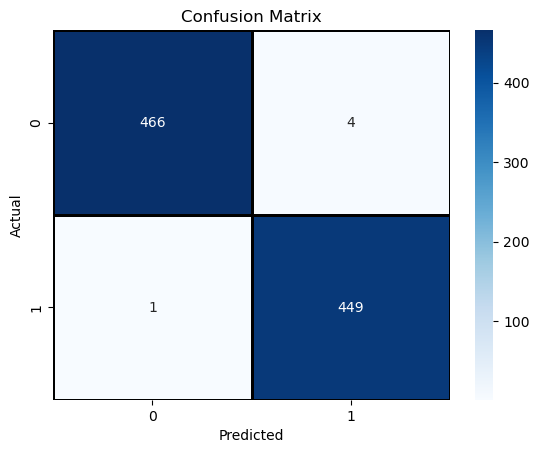

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       470
           1       0.99      1.00      0.99       450

    accuracy                           0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920



In [203]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = model.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',linewidths=1, linecolor='black')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print(classification_report(y_test, y_predict))
